In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb

# Load data

In [2]:
pd_GSE40279 = pd.read_csv('./data/GSE40279_average_beta.txt', sep="\t", header=0,index_col=0)
meta_GSE40279 = pd.read_csv('./data/GSE40279_family.soft-MetaData.csv', sep="|", header=0)

In [3]:
ids = meta_GSE40279.index.values
train_ids, test_ids = train_test_split(ids, test_size=0.2)
X_train = pd_GSE40279.values.T[train_ids]
X_test = pd_GSE40279.values.T[test_ids]

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
y_train = meta_GSE40279['age (y)'][train_ids]
y_test = meta_GSE40279['age (y)'][test_ids]

# Utils

In [6]:
def calc_metrics(y, y_pred):
    mae = metrics.mean_absolute_error(y, y_pred)
    mse = metrics.mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)  
    r2 = metrics.r2_score(y,y_pred)
    return r2, rmse

In [7]:
def plot_clock(y, y_pred, r2, rmse, title=''):
    fig, ax = plt.subplots(figsize=(6,6))

    ax.scatter(y, y_pred, color='lightgreen')
    ax.plot([0, 120],[0, 120], 'b:', lw=1)
    ax.set_xlabel('Age (years)')
    ax.set_ylabel('Predicted age (years)')
    ax.set_title('Age Prediction' + title)
    ax.text(0.02, 0.95, f'R2 = {r2:0.2f}\nRMSE = {rmse:0.2f}',  transform=ax.transAxes)

    plt.show()

# Model fit

## Elastic Net

In [8]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet()
EN.fit(X_train, y_train)

ElasticNet()

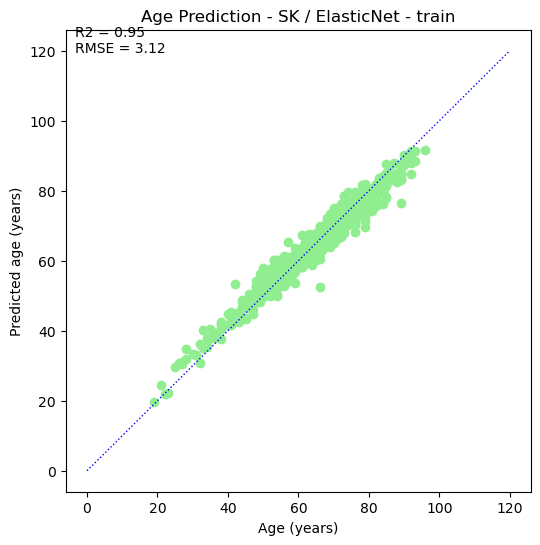

In [9]:
y_pred_EN = EN.predict(X_train)
r2_EN,rmse_EN = calc_metrics(y_train, y_pred_EN)
plot_clock(y_train, y_pred_EN, r2_EN, rmse_EN, title=' - SK / ElasticNet - train')

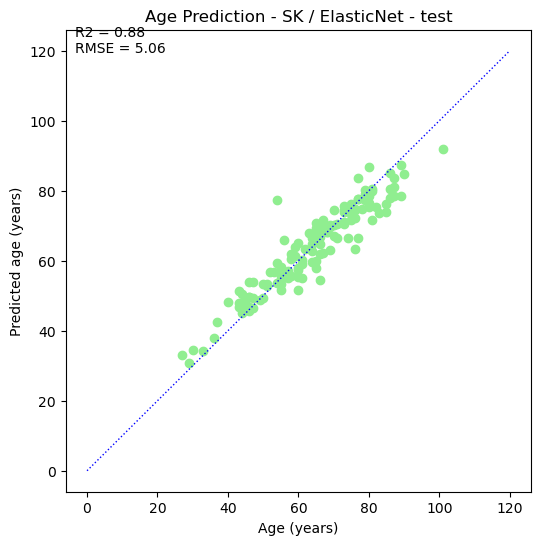

In [10]:
y_pred_EN = EN.predict(X_test)
r2_EN,rmse_EN = calc_metrics(y_test, y_pred_EN)
plot_clock(y_test, y_pred_EN, r2_EN, rmse_EN, title=' - SK / ElasticNet - test')


In [11]:
#alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic'
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=0.8, l1_ratio=0.7)
EN.fit(X_train, y_train)

ElasticNet(alpha=0.8, l1_ratio=0.7)

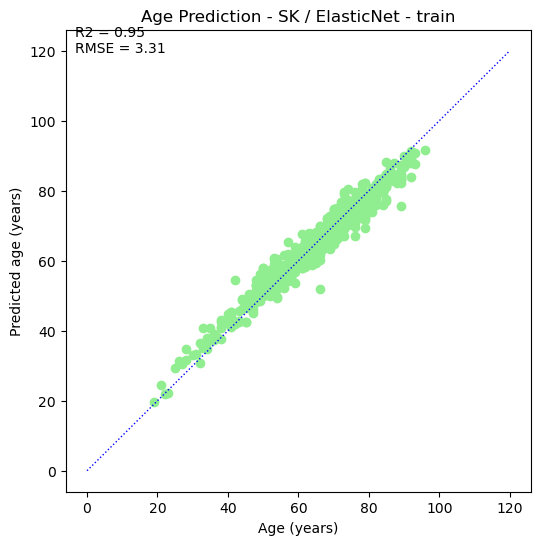

In [12]:
y_pred_EN = EN.predict(X_train)
r2_EN,rmse_EN = calc_metrics(y_train, y_pred_EN)
plot_clock(y_train, y_pred_EN, r2_EN, rmse_EN, title=' - SK / ElasticNet - train')

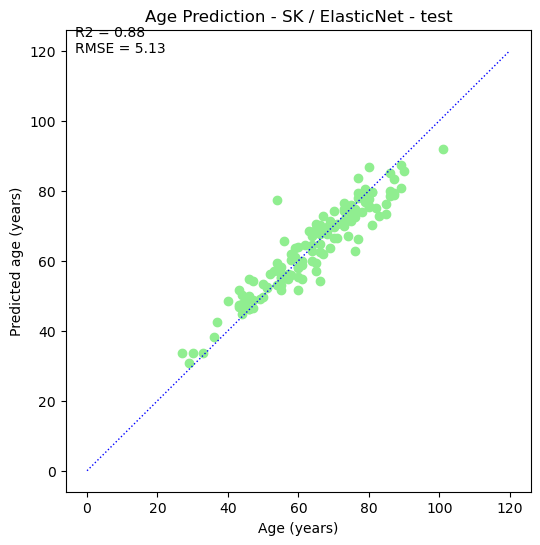

In [13]:
y_pred_EN = EN.predict(X_test)
r2_EN,rmse_EN = calc_metrics(y_test, y_pred_EN)
plot_clock(y_test, y_pred_EN, r2_EN, rmse_EN, title=' - SK / ElasticNet - test')

## PCA

In [14]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Lasso

In [15]:
from sklearn.linear_model import Lasso
LCV = Lasso()
LCV.fit(X_train, y_train)

Lasso()

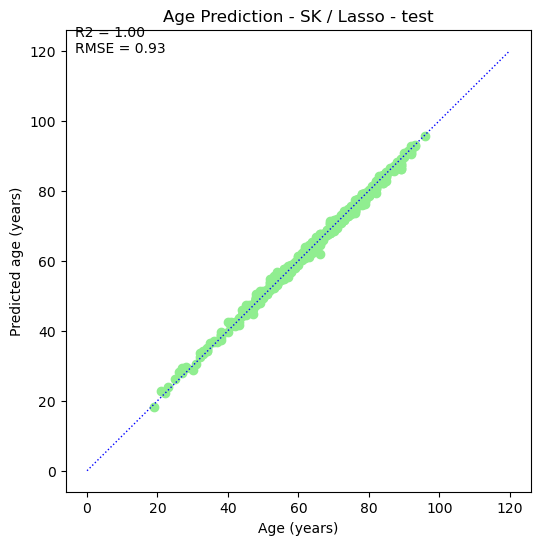

In [16]:
y_pred = LCV.predict(X_train)
r2,rmse = calc_metrics(y_train, y_pred)
plot_clock(y_train, y_pred, r2, rmse, title=' - SK / Lasso - test')

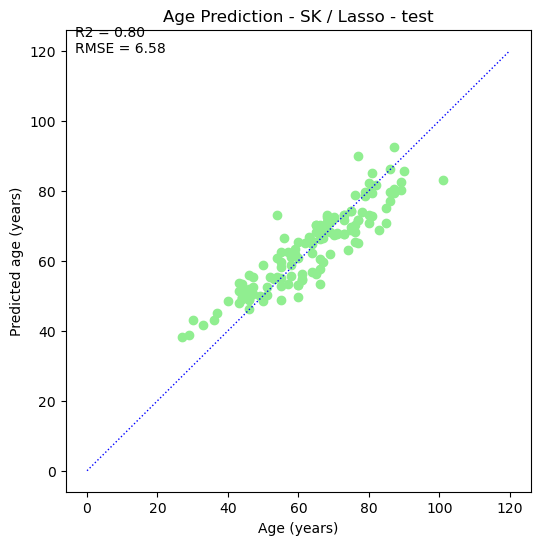

In [17]:
y_pred = LCV.predict(X_test)
r2,rmse = calc_metrics(y_test, y_pred)
plot_clock(y_test, y_pred, r2, rmse, title=' - SK / Lasso - test')

## XGBoost

C:\Users\bot2bp\.conda\envs\hannum38\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


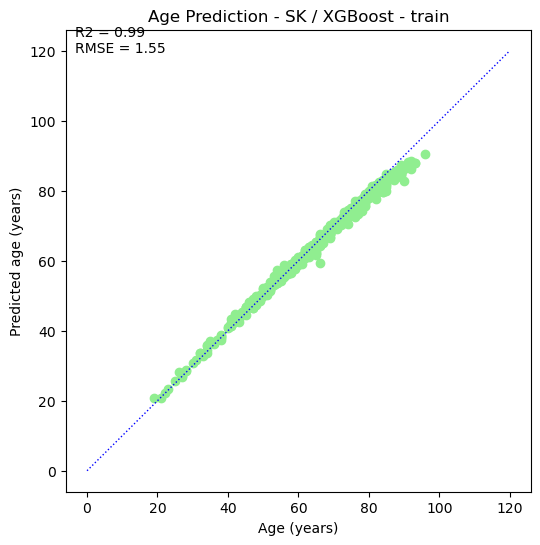

In [18]:
XGB = xgb.XGBRegressor(learning_rate = 0.1,max_depth = 5, alpha = 5, n_estimators = 50) 
XGB.fit(X_train,y_train) 

y_pred_XGB = XGB.predict(X_train)
r2,rmse = calc_metrics(y_train, y_pred_XGB)
plot_clock(y_train, y_pred_XGB, r2, rmse, title=' - SK / XGBoost - train')


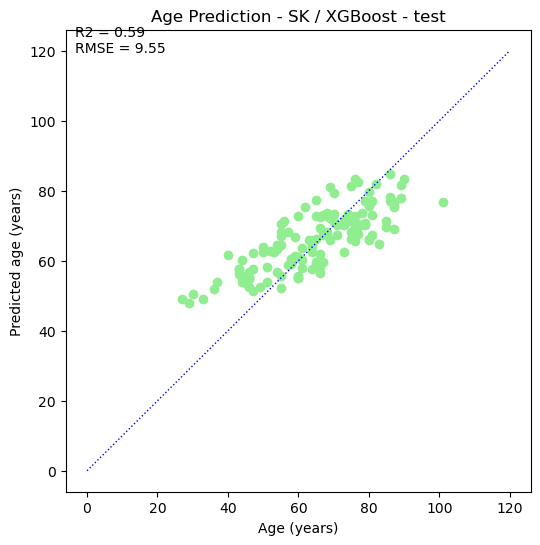

In [19]:
y_pred_XGB = XGB.predict(X_test)
r2,rmse = calc_metrics(y_test, y_pred_XGB)
plot_clock(y_test, y_pred_XGB, r2, rmse, title=' - SK / XGBoost - test')